In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
Data_train = pd.read_csv("C:/Users/Vaibhav Banga/Downloads/train_LZdllcl (2).csv")
Data_test = pd.read_csv("C:/Users/Vaibhav Banga/Downloads/test_2umaH9m (2).csv")
copy = Data_test.copy()

# EDA-Exploratory Data Analysis

In [156]:
Data_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [157]:
Data_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [158]:
Data_train.shape

(54808, 14)

In [159]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


# Cleaning of Data

In [160]:
Data_train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [161]:
Data_train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [162]:
Data_train['gender'] = Data_train['gender'].map({'f':0,'m':1})
Data_test['gender'] = Data_test['gender'].map({'f':0,'m':1})

In [163]:
Data_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0


In [164]:
from sklearn.preprocessing import LabelEncoder
Lr = LabelEncoder()

In [165]:
Data_train['education'] = Data_train['education'].astype(dtype = str)
Data_test['education'] = Data_test['education'].astype(dtype = str)

In [166]:
Data_train['education'] = Lr.fit_transform(Data_train['education'])
Data_train['department'] = Lr.fit_transform(Data_train['department'])
Data_train['recruitment_channel'] = Lr.fit_transform(Data_train['recruitment_channel'])

Data_test['education'] = Lr.fit_transform(Data_test['education'])
Data_test['department'] = Lr.fit_transform(Data_test['department'])
Data_test['recruitment_channel'] = Lr.fit_transform(Data_test['recruitment_channel'])
Data_test['region'] = Lr.fit_transform(Data_test['region'])

In [167]:
Data_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [168]:
Data_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [169]:
Data_train.shape

(54808, 14)

In [170]:
Data_train.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0
5,58896,0,11,0,1,2,2,31,3.0,7,0,0,85,0
6,20379,4,12,0,0,0,1,31,3.0,5,0,0,59,0
7,16290,4,27,2,1,2,1,33,3.0,6,0,0,63,0
8,73202,0,12,0,1,0,1,28,4.0,5,0,0,83,0
9,28911,7,0,2,1,2,1,32,5.0,5,1,0,54,0


In [171]:
Data_train['avg_training_score'].value_counts()

50    2716
49    2681
48    2437
51    2347
60    2155
      ... 
98      37
99      35
41      26
40       5
39       2
Name: avg_training_score, Length: 61, dtype: int64

In [172]:
Data_test.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,NaN,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61
5,46232,5,31,0,1,2,1,36,3.0,2,0,0,68
6,54542,1,11,0,1,0,1,33,5.0,3,1,0,57
7,67269,0,14,0,1,2,2,36,3.0,3,0,0,85
8,66174,8,31,2,1,0,1,51,4.0,11,0,0,75
9,76303,8,14,0,1,2,1,29,5.0,2,1,0,76


In [173]:
Data_train.describe()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,4.972796,15.428970,0.691176,0.702379,0.868158,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,2.506046,8.764954,1.010851,0.457216,0.980713,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,4.000000,11.000000,0.000000,0.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,5.000000,14.000000,0.000000,1.000000,0.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,7.000000,21.000000,2.000000,1.000000,2.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,8.000000,33.000000,3.000000,1.000000,2.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [174]:
Data_train['previous_year_rating'].fillna(Data_train['previous_year_rating'].mean(),inplace = True)
Data_test['previous_year_rating'].fillna(Data_test['previous_year_rating'].mean(),inplace = True)
Data_test['education'].fillna(Data_test['education'].mode(),inplace = True)

In [175]:
Data_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [176]:
Data_test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [177]:
Data_test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

# Uni-Variate Data Analysis

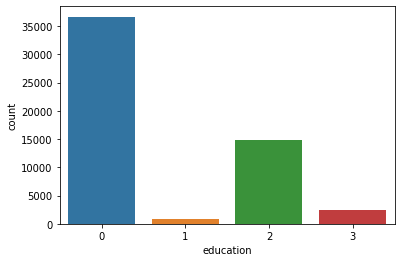

In [178]:
sns.countplot(Data_train['education'])

In [179]:
Data_train['education'].value_counts()/54808*100

0    66.904467
2    27.231426
3     4.395344
1     1.468764
Name: education, dtype: float64

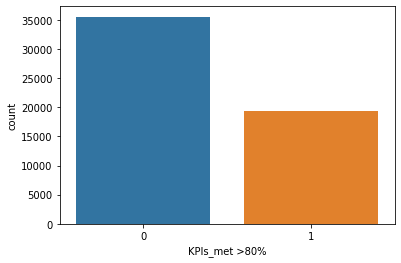

In [180]:
sns.countplot(Data_train['KPIs_met >80%'])

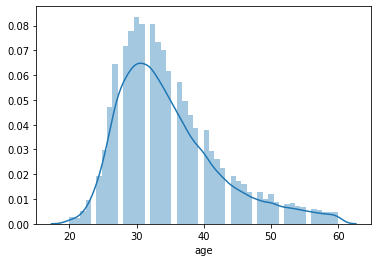

In [181]:
sns.distplot(Data_train['age'])

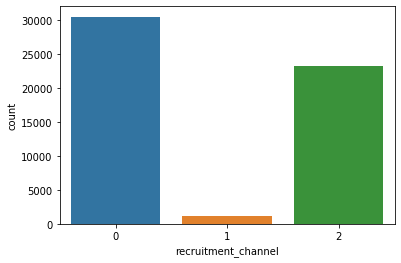

In [182]:
sns.countplot(Data_train['recruitment_channel'])

In [183]:
Data_train['recruitment_channel'].value_counts()/54808*100

0    55.550285
2    42.366078
1     2.083637
Name: recruitment_channel, dtype: float64

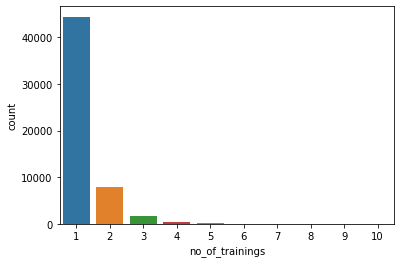

In [184]:
sns.countplot(Data_train['no_of_trainings'])

In [185]:
Data_train['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

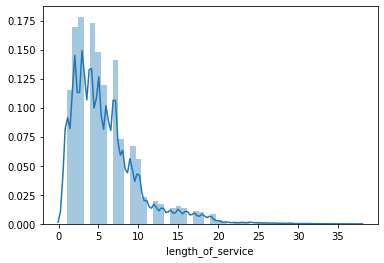

In [186]:
sns.distplot(Data_train['length_of_service'])

In [187]:
#Data_train = Data_train[Data_train['length_of_service']<1]

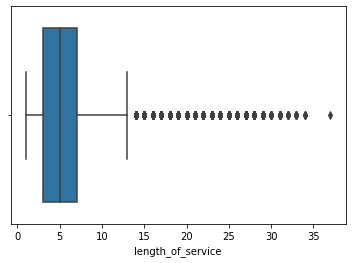

In [188]:
sns.boxplot(Data_train['length_of_service'])

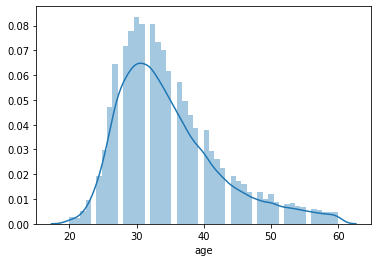

In [189]:
sns.distplot(Data_train['age'])

In [190]:
Data_train = Data_train[Data_train['age']<50]

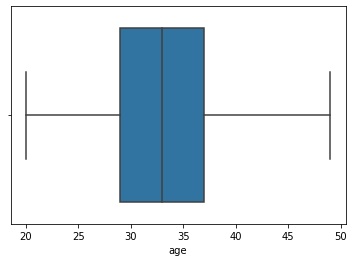

In [191]:
sns.boxplot(Data_train['age'])

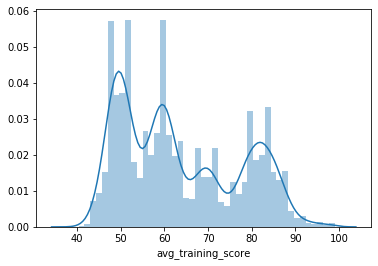

In [192]:
sns.distplot(Data_train['avg_training_score'])

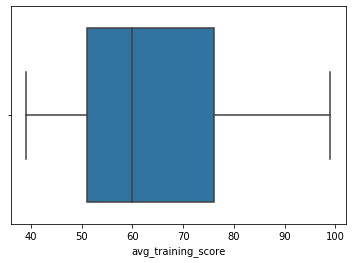

In [193]:
sns.boxplot(Data_train['avg_training_score'])

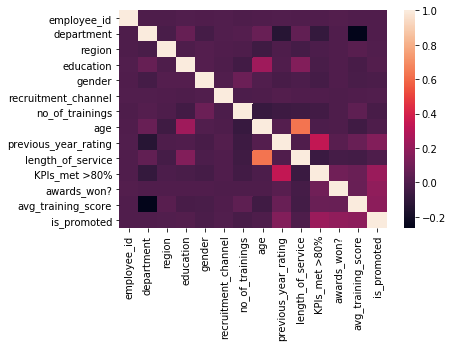

In [194]:
sns.heatmap(Data_train.corr())

In [195]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Data_train.drop(['is_promoted','employee_id'],axis=1),Data_train['is_promoted'],test_size = 0.4,random_state = 402)

In [196]:
from sklearn.linear_model import LogisticRegression

In [197]:
LR = LogisticRegression()

In [198]:
LR.fit(X_train,y_train)

C:\Users\Vaibhav Banga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [199]:
Pred = LR.predict(X_test)

In [200]:
Pred_tr = LR.predict(X_train)

In [201]:
from sklearn.metrics import accuracy_score,r2_score,classification_report

In [202]:
accuracy_score(y_test,Pred)

0.9138232720909887

In [203]:
accuracy_score(y_train,Pred_tr)

0.9145523476232138

In [204]:
from sklearn.tree import DecisionTreeClassifier

In [205]:
DTC = DecisionTreeClassifier()

In [206]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [207]:
Pred_DTC = DTC.predict(X_test)

In [208]:
Pred_DTC_Tr = DTC.predict(X_train)

In [209]:
accuracy_score(y_test,Pred_DTC)

0.8899095946340041

In [210]:
accuracy_score(y_train,Pred_DTC_Tr)

0.9999351932860244

In [211]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [213]:
Pred_RF = RF.predict(X_test)

In [214]:
Pred_Rf = RF.predict(X_train)

In [215]:
accuracy_score(y_test,Pred_RF)

0.9319529503256537

In [216]:
accuracy_score(y_train,Pred_Rf)

0.9999351932860244

In [217]:
print(classification_report(y_test,Pred_RF))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     18798
           1       0.80      0.28      0.42      1776

    accuracy                           0.93     20574
   macro avg       0.87      0.64      0.69     20574
weighted avg       0.92      0.93      0.92     20574



In [218]:
print(classification_report(y_test,Pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     18798
           1       0.51      0.04      0.07      1776

    accuracy                           0.91     20574
   macro avg       0.71      0.52      0.51     20574
weighted avg       0.88      0.91      0.88     20574



In [219]:
#Submission = LR.predict(Data_test.drop(['employee_id'],axis=1))
#Submission

In [220]:
Submission_RF = RF.predict(Data_test.drop(['employee_id'],axis=1))
Submission_RF

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [221]:
DF1 = pd.DataFrame(Submission_RF, columns = ['is_promoted'],index =copy['employee_id'] )

In [222]:
Data_train.shape

(51435, 14)

In [223]:
Data_train.shape

(51435, 14)